In [38]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
# Load
train_df = pd.read_csv("datasets/train.csv")

In [ ]:
# Preprocess
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())

train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})

train_df = pd.get_dummies(train_df, columns=["Embarked"], drop_first=True)

train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1

train_df.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)

In [35]:
# Split
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [36]:
# Train
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

Accuracy: 0.7821229050279329
Precision: 0.7931034482758621
Recall: 0.6301369863013698
F1 Score: 0.7022900763358778
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       106
           1       0.79      0.63      0.70        73

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



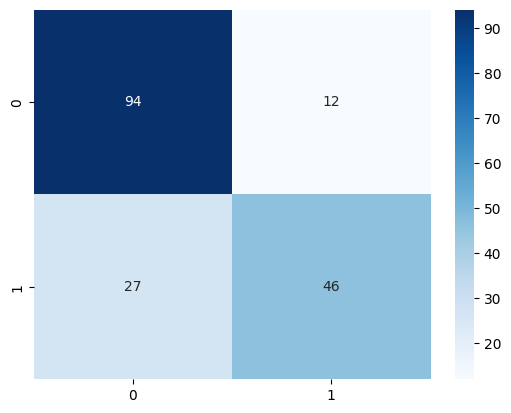

In [40]:
# Evaluation
y_pred = model.predict(X_val)
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues")
plt.show()